Name: Utsa Poddar
UCID: 30071131

94.29686466650284 30.014611342426875
Shot!
94.30842784990108 29.997649171428947
Shot!
94.31998864732564 29.98068068955525
Shot!


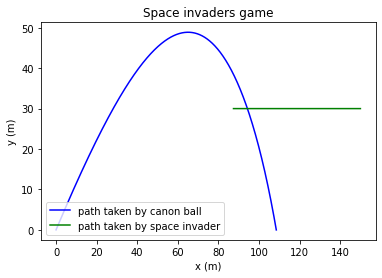

In [ ]:
import matplotlib.pyplot as plt
import math

#setting parameters

#gravitational acceleration 
g=9.81
#diameter of the object in meters
D=0.043
# mass of the object
m=0.046

#features of the drag constant
B=1.6*10**-4
C=0.25
b=B*D
c=C*(D**2)
#time spacing
dt=0.001

#angle of throw (in degree)
theta=50
#degree to radians
theta_rads=math.radians(theta)

#initial conditions (with non linear air resistance)
t=0
v0=60
vy=v0*math.sin(theta_rads)
vx=v0*math.cos(theta_rads)
y=0
x=0



#lists for the motion in non-linear air resistence
timev=[t]
velocityy=[vy]
velocityx=[vx]
yy=[y]
xx=[x]


#loop for the Euler integration
while(y>=0):
  #model with non linear air resistence
  #determining the change in vertical velocity
  dvy=-g*dt-(c/m)*math.sqrt(vx**2+vy**2)*vy*dt
  #updating vertical velocity
  vy=vy+dvy

  #determining the change in vertical height
  dy=dt*vy
  #updating vertical height
  y=y+dy
  #determining the change in horizontal velocity
  dvx=-(c/m)*math.sqrt(vx**2+vy**2)*vx*dt
  #updating horizontal velocity
  vx=dvx+vx
  #determining the change in horizontal distance
  dx=dt*vx
  #updating horizontal distance
  x=x+dx
  #updating time
  t=t+dt
  #adding the values of time, velocity, x position and y position into their respective lists
  timev.append(t)
  velocityy.append(vy)
  velocityx.append(vx)
  yy.append(y)
  xx.append(x)

#list to keep track of the space invader at a fixed height
invader_ylist=[]
invader_xlist=[]
fixed_height=30
#initializing the conditions for the space invader
vs=-10
x_i=150

#creating the path for the invader 
for i in timev:
  #creating a list of constant height for the invader
  invader_ylist.append(fixed_height)
  #determining the change in horizontal distance for the invader
  dx_i=dt*vs
  #updating horizontal distance for the invader
  x_i=x_i+dx_i
  #adding the values of horizontal distance to the appropriate list
  invader_xlist.append(x_i)

#determing if the cannon ball and the invader were at the same (x,y) point at the same time.
#as the xx points for the invader is constant for the invader, only checking for the y point is required
for i in range(len(timev)):
  if abs(invader_ylist[i]-yy[i])<=D/2 and (xx[i]-invader_xlist[i])<=D/2 and invader_xlist[-1]<xx[i]<invader_xlist[0]:
    print(xx[i],yy[i])
    print("Shot!") 

#ploting two lines for the projectile motion and the space invader
plt.plot(xx,yy,'b',label="path taken by canon ball")
plt.plot(invader_xlist,invader_ylist,'g',label="path taken by space invader")
#labeling the axis with units
plt.title("Space invaders game")
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()
plt.show()

It is assummed that the space invader is a point particle, however, the canon ball is not, it has a diameter of 0.043m. Hence if the distance between the ball and the invader is less than the radius (D/2) in the x-direction, as well as if the absolute distance between the ball and the invader is less than the radius (D/2) in the y-direction, the canonball hits. It hits when x is around 94.3m